In [114]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [115]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
data = pd.read_csv('food_coded.csv')

In [116]:
# 取特徵
data = data[['weight','Gender','sports','breakfast','coffee','drink','fries','soup','cuisine','ethnic_food','greek_food','indian_food','italian_food','persian_food','thai_food']]

#描述性統計- data describe
def describe(df):
    df['weight'] = df['weight'].astype('float')
    df_des=df.describe(include='all',datetime_is_numeric=True)
    return df_des.round(2)
data_des = describe(data.astype('str'))
# data_des
df_transpose = data_des.transpose()

df_transpose


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
weight,122.0,NaN,NaN,NaN,159.05,32.38,100.0,135.0,155.0,180.0,265.0
Gender,125,2,1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,125,3,1.0,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breakfast,125,2,1,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coffee,125,2,2,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drink,125,3,2.0,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fries,125,2,1,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soup,125,3,1.0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine,125,7,1.0,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnic_food,125,5,5,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# 處理遺缺值
data = data.dropna()
# 指定索引
data = data.reset_index(drop=True)

# 使用四分位數來將體重分類
data['weight']=data['weight'].astype(int)
def BMIStandard(data):
#     if data["weight"]<135:
#         data["weight_range"] = "first"
#     elif data["weight"]<155:
#         data["weight_range"]= "second"
#     elif data["weight"]<180:
#         data["weight_range"] = "third"
#     else:
#         data["weight_range"] = "forth"
        
    if data["weight"]<155:
        data["weight_range"] = "first"
    else:
        data["weight_range"] = "second"
    return data
data=data.apply(BMIStandard,axis=1)


labels = data["weight_range"].unique().tolist()
data["weight_range"]=data["weight_range"].apply(lambda n: labels.index(n))

In [118]:
# data.shape
des_data_wr = describe(data.astype('str'))
# data_des
df_transpose_wr = des_data_wr.transpose()

df_transpose_wr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
weight,102.0,NaN,NaN,NaN,157.85,32.2,100.0,135.0,155.0,178.75,265.0
Gender,102,2,1.0,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,102,2,1.0,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breakfast,102,2,1.0,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coffee,102,2,2.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drink,102,2,2.0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fries,102,2,1.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soup,102,2,1.0,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine,102,6,1.0,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnic_food,102,5,5.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


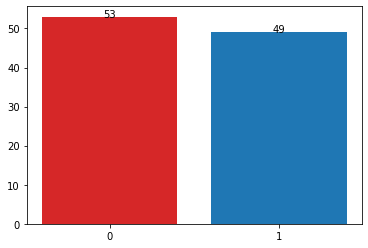

In [104]:
data['weight_range'].value_counts().tolist()[0]
plt.bar(['0','1'], data['weight_range'].value_counts().tolist(), color=['tab:red', 'tab:blue'])
for x,y in enumerate(data['weight_range'].value_counts().tolist()):plt.text(x,y,'%s'%y,ha='center')

['Gender', 'sports', 'breakfast', 'coffee', 'drink', 'fries', 'soup', 'cuisine', 'ethnic_food', 'greek_food', 'indian_food', 'italian_food', 'persian_food', 'thai_food']


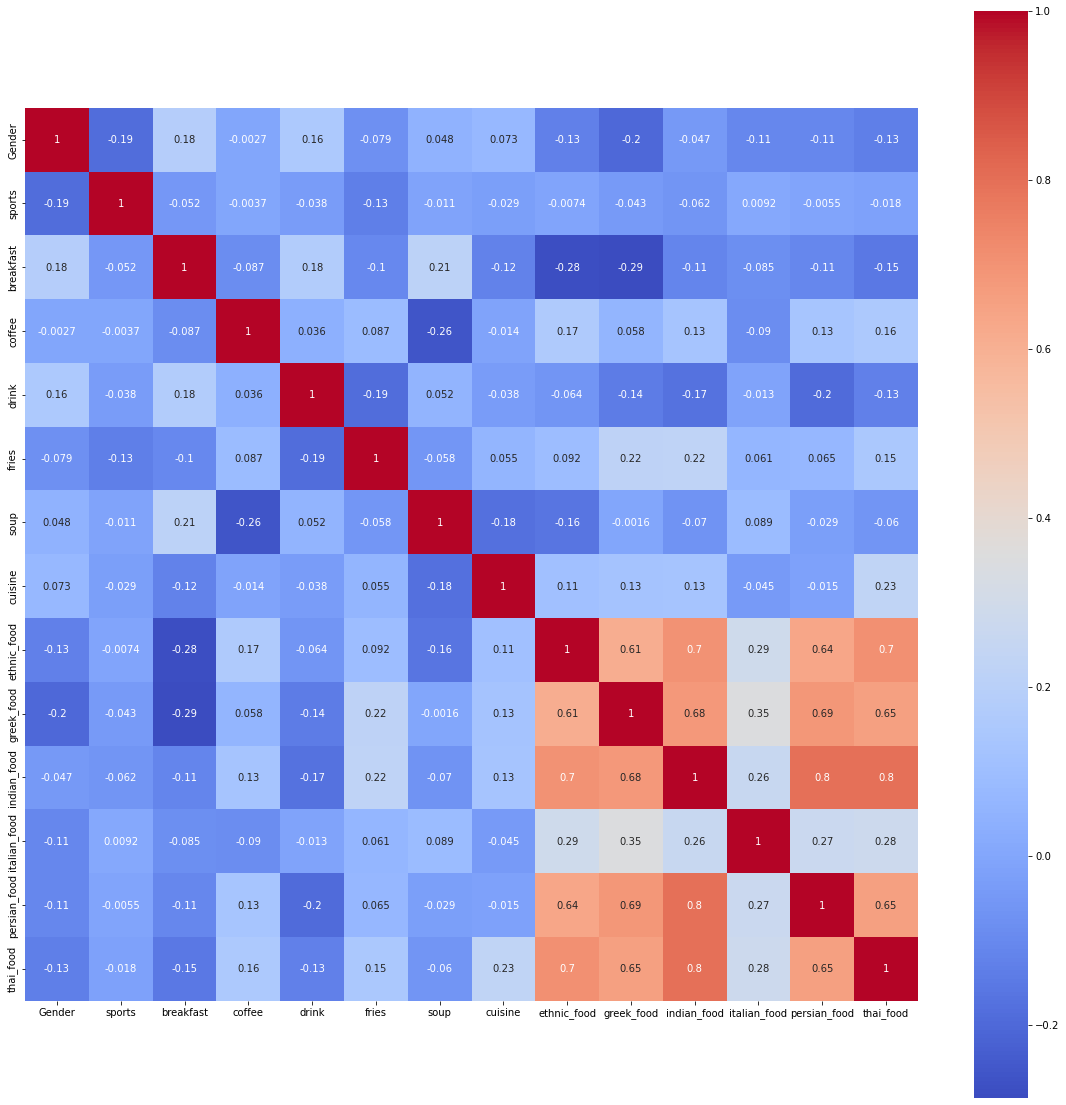

In [119]:
#取特徵欄位
features_mean= list(data.columns[1:15])
print(features_mean)

#相關性
plt.figure(figsize=(20,20))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

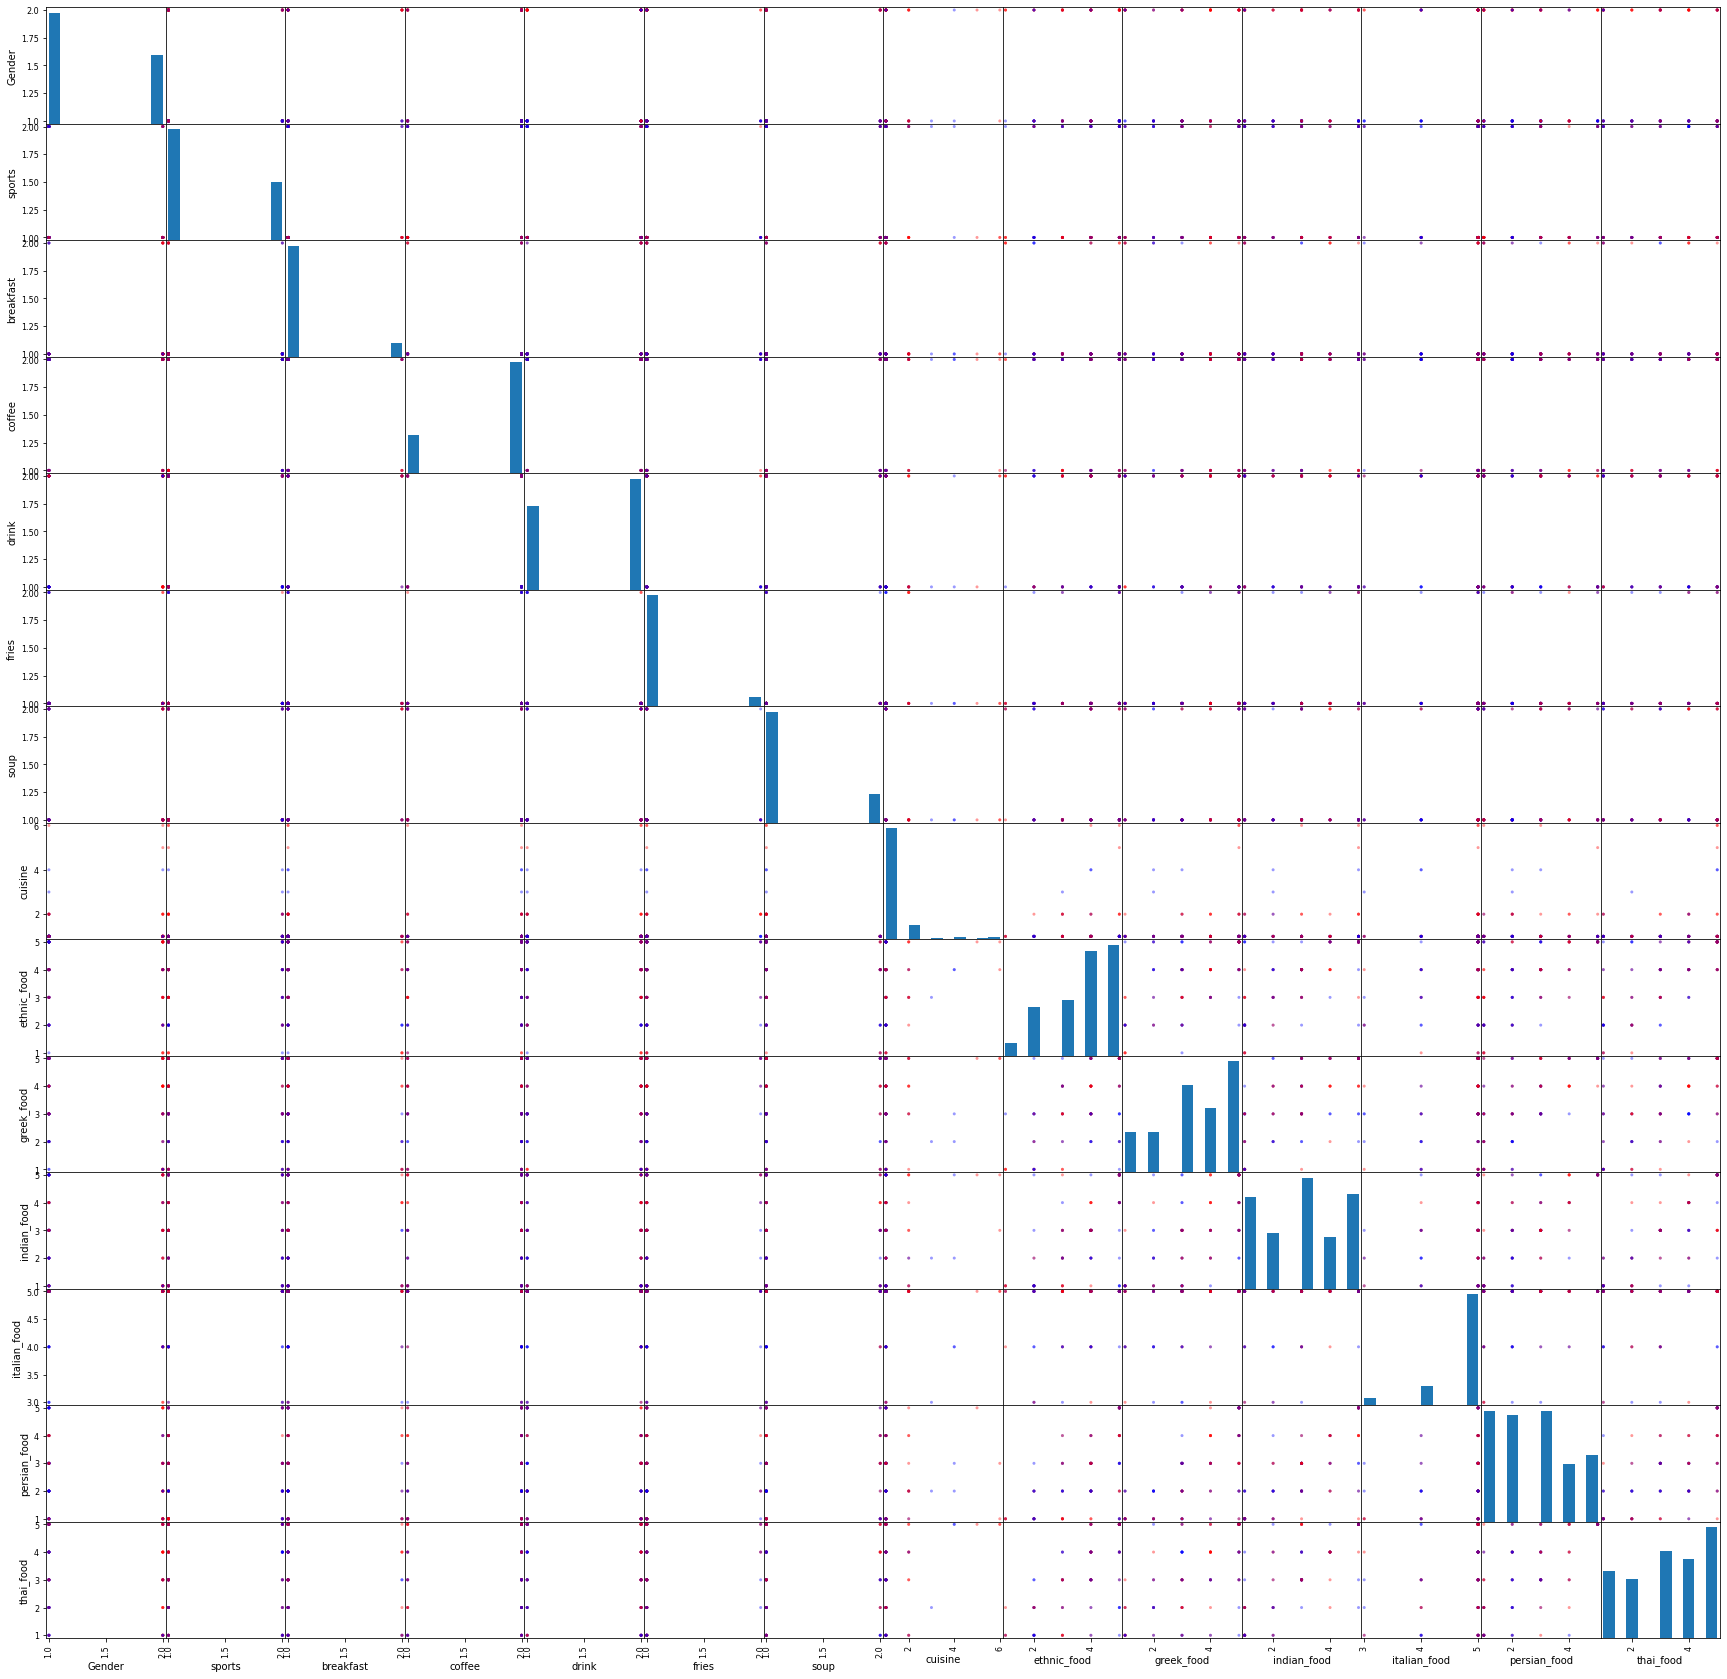

In [7]:
color_dic = {0:'red', 1:'blue'}
colors = data['weight_range'].map(lambda x: color_dic.get(x))

#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((30,30)));

plt.show()

C:\Users\jenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\jenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


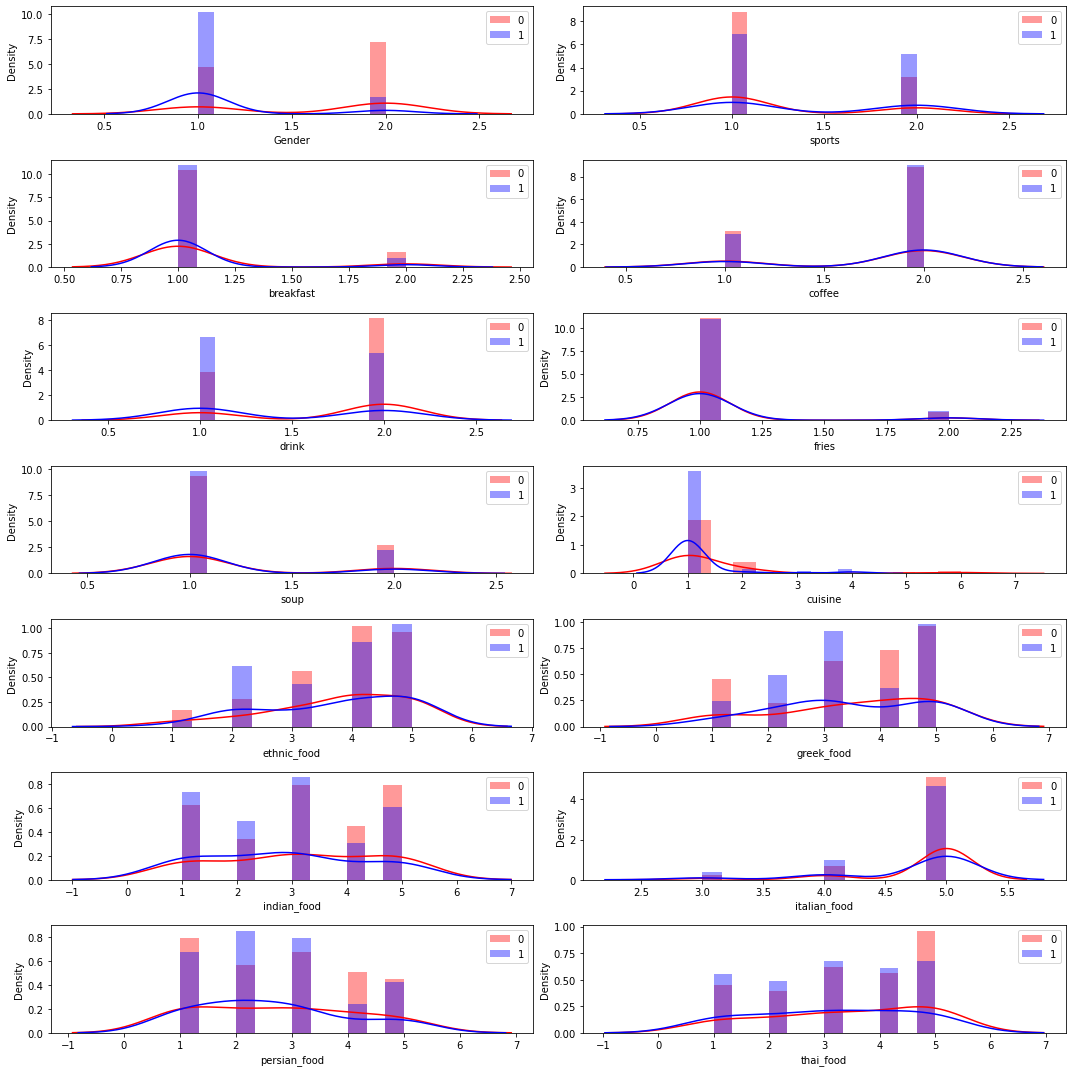

In [8]:
#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['weight_range']==0][feature], bins=bins, color='red', label='0');
    sns.distplot(data[data['weight_range']==1][feature], bins=bins, color='blue', label='1');
#     sns.distplot(data[data['weight_range']==2][feature], bins=bins, color='green', label='2');
#     sns.distplot(data[data['weight_range']==3][feature], bins=bins, color='yellow', label='3');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

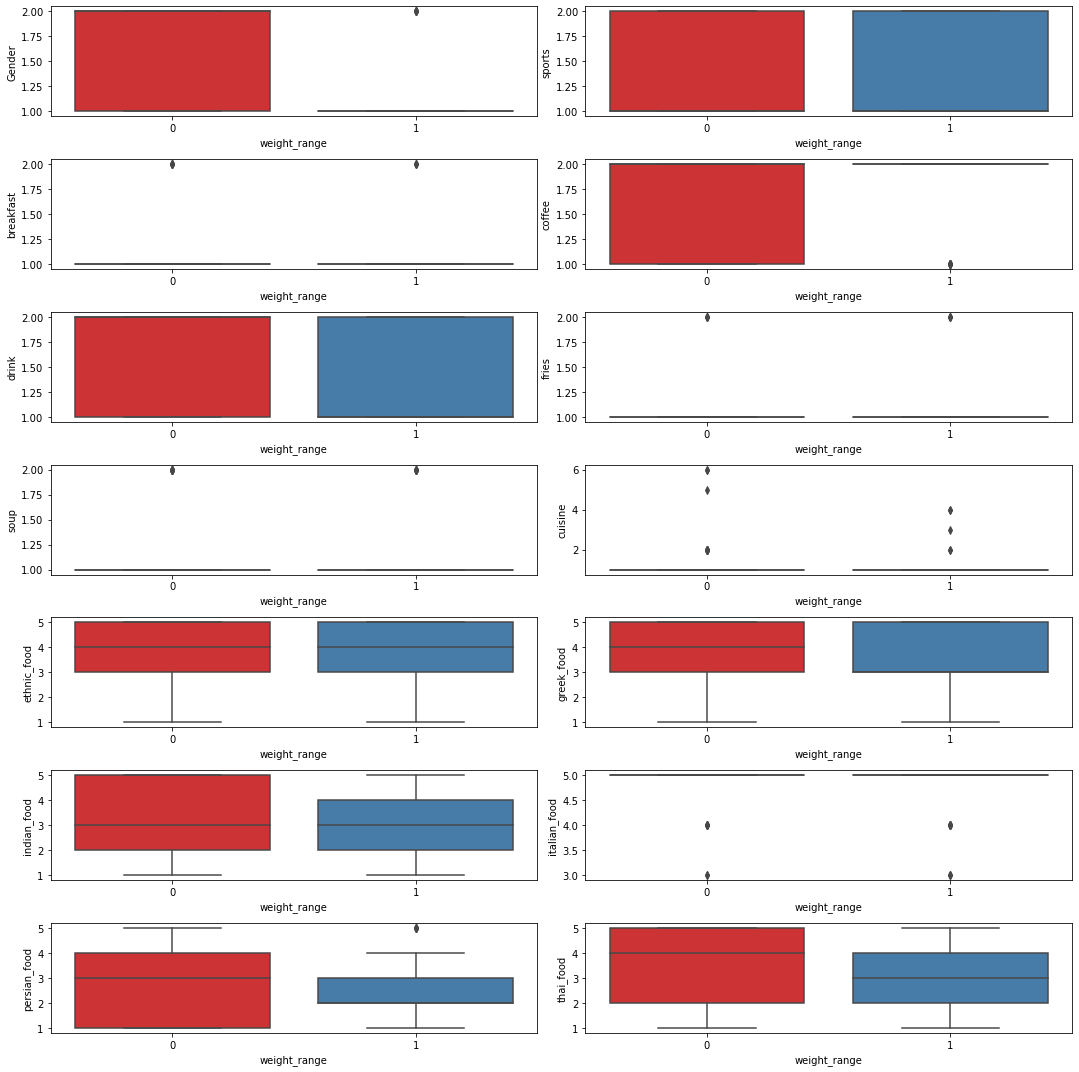

In [9]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='weight_range', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

In [171]:
# 分train test
X = data.loc[:,features_mean]
y = data.loc[:, 'weight_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)



In [186]:
accuracy_selection = []
cvs_selection = []
roc_auc = []
recall = []

SGD Classifier Accuracy: 42.86%


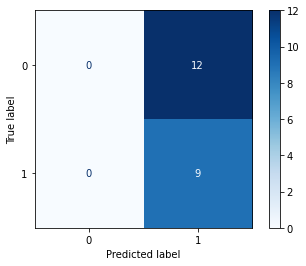

In [187]:
model_SGD = SGDClassifier(loss = 'log')
model_SGD.fit(X_train, y_train)
model_SGD_prediction = model_SGD.predict(X_test)
model_SGD_scores = cross_val_score(model_SGD, X, y, cv=10)

model_SGD_y_score = model_SGD.predict_proba(X_test)
fpr_SGD_model, tpr_SGD_model,_ = metrics.roc_curve(np.array(y_test), model_SGD_y_score[::,1])

roc_auc.append(metrics.auc(fpr_SGD_model,tpr_SGD_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_SGD_prediction, y_test))
cvs_selection.append(np.mean(model_SGD_scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(model_SGD_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_SGD_scores), np.std(model_SGD_scores)*2))

model_SGD_pred_test_y = model_SGD.predict(X_test)
metrics.plot_confusion_matrix(model_SGD, X_test.values, y_test, cmap='Blues')
plt.grid(False)

SVC Accuracy: 52.38%


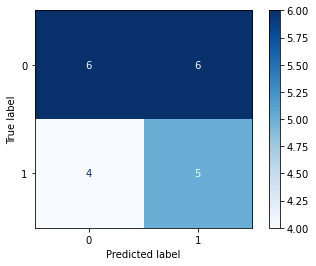

In [188]:

model_SVC = SVC(probability=True)
model_SVC.fit(X_train, y_train)
model_SVC_prediction = model_SVC.predict(X_test)
model_SVC_scores = cross_val_score(model_SVC, X, y, cv=10)

model_SVC_y_score = model_SVC.predict_proba(X_test)
fpr_SVC_model, tpr_SVC_model,_ = metrics.roc_curve(np.array(y_test), model_SVC_y_score[::,1])

roc_auc.append(metrics.auc(fpr_SVC_model,tpr_SVC_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_SVC_prediction, y_test))
cvs_selection.append(np.mean(model_SVC_scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(model_SVC_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_SVC_scores), np.std(model_SVC_scores)*2))

model_SVC_pred_test_y = model_SVC.predict(X_test)
metrics.plot_confusion_matrix(model_SVC, X_test.values, y_test, cmap='Blues')
plt.grid(False)

NuSVC Accuracy: 66.67%


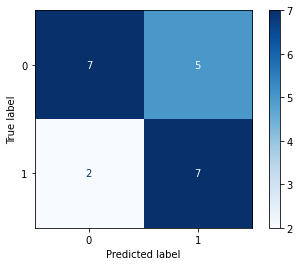

In [189]:

model_NuSVC = NuSVC(probability=True)
model_NuSVC.fit(X_train, y_train)
model_NuSVC_prediciton = model_NuSVC.predict(X_test)
model_NuSVC_scores = cross_val_score(model_NuSVC, X, y, cv=10)

model_NuSVC_y_score = model_NuSVC.predict_proba(X_test)
fpr_NuSVC_model, tpr_NuSVC_model,_ = metrics.roc_curve(np.array(y_test), model_NuSVC_y_score[::,1])

roc_auc.append(metrics.auc(fpr_NuSVC_model,tpr_NuSVC_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_NuSVC_prediciton, y_test))
cvs_selection.append(np.mean(model_NuSVC_scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(model_NuSVC_prediciton, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_NuSVC_scores), np.std(model_NuSVC_scores)*2))

model_NuSVC_pred_test_y = model_NuSVC.predict(X_test)
metrics.plot_confusion_matrix(model_NuSVC, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Accuracy: 42.86%


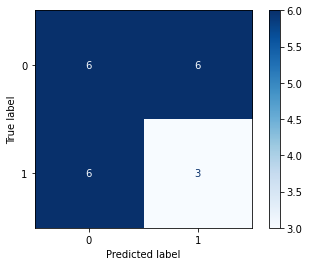

In [190]:
model_KNeighborsClassifier = KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train, y_train)
model_KNeighborsClassifier_prediction = model_KNeighborsClassifier.predict(X_test)
model_KNeighborsClassifier_scores = cross_val_score(model_KNeighborsClassifier, X, y, cv=10)

model_KN_y_score = model_KNeighborsClassifier.predict_proba(X_test)
fpr_KN_model, tpr_KN_model,_ = metrics.roc_curve(np.array(y_test), model_KN_y_score[::,1])

roc_auc.append(metrics.auc(fpr_KN_model,tpr_KN_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_KNeighborsClassifier_prediction, y_test))
cvs_selection.append(np.mean(model_KNeighborsClassifier_scores))

print("Accuracy: {0:.2%}".format(accuracy_score(model_KNeighborsClassifier_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_KNeighborsClassifier_scores), np.std(model_KNeighborsClassifier_scores)*2))

model_KNeighborsClassifier_pred_test_y = model_KNeighborsClassifier.predict(X_test)
metrics.plot_confusion_matrix(model_KNeighborsClassifier, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Accuracy: 52.38%


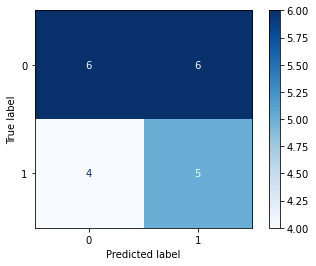

In [191]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train, y_train)
model_GaussianNB_prediction = model_GaussianNB.predict(X_test)
model_GaussianNB_scores = cross_val_score(model_GaussianNB, X, y, cv=10)

model_GNB_y_score = model_GaussianNB.predict_proba(X_test)
fpr_GNB_model, tpr_GNB_model,_ = metrics.roc_curve(np.array(y_test), model_GNB_y_score[::,1])

roc_auc.append(metrics.auc(fpr_GNB_model,tpr_GNB_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_GaussianNB_prediction, y_test))
cvs_selection.append(np.mean(model_GaussianNB_scores))

print("Accuracy: {0:.2%}".format(accuracy_score(model_GaussianNB_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_GaussianNB_scores), np.std(model_GaussianNB_scores)*2))

model_GaussianNB_pred_test_y = model_GaussianNB.predict(X_test)
metrics.plot_confusion_matrix(model_GaussianNB, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Random Forest Accuracy: 71.43%


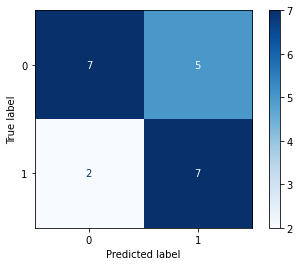

In [192]:
model_RandomForestClassifier = RandomForestClassifier()
model_RandomForestClassifier.fit(X_train, y_train)
model_RandomForestClassifier_prediction = model_RandomForestClassifier.predict(X_test)
model_RandomForestClassifier_scores = cross_val_score(model_RandomForestClassifier, X, y, cv=10)

model_RF_y_score = model_RandomForestClassifier.fit(X_train, y_train).predict_proba(X_test)
fpr_RF_model, tpr_RF_model,_ = metrics.roc_curve(np.array(y_test), model_RF_y_score[::,1])

roc_auc.append(metrics.auc(fpr_RF_model,tpr_RF_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_RandomForestClassifier_prediction, y_test))
cvs_selection.append(np.mean(model_RandomForestClassifier_scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(model_RandomForestClassifier_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_RandomForestClassifier_scores), np.std(model_RandomForestClassifier_scores)*2))

model_RandomForestClassifier_pred_test_y = model_RandomForestClassifier.predict(X_test)
metrics.plot_confusion_matrix(model_RandomForestClassifier, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Extra Trees Accuracy: 71.43%


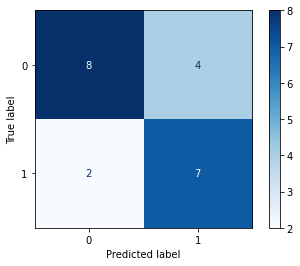

In [193]:
model_ExtraTreesClassifier = ExtraTreesClassifier()
model_ExtraTreesClassifier.fit(X_train, y_train)
model_ExtraTreesClassifier_prediction = model_ExtraTreesClassifier.predict(X_test)
model_ExtraTreesClassifier_scores = cross_val_score(model_ExtraTreesClassifier, X, y, cv=10)

model_EC_y_score = model_ExtraTreesClassifier.fit(X_train, y_train).predict_proba(X_test)
fpr_EC_model, tpr_EC_model,_ = metrics.roc_curve(np.array(y_test), model_EC_y_score[::,1])

roc_auc.append(metrics.auc(fpr_EC_model,tpr_EC_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_ExtraTreesClassifier_prediction, y_test))
cvs_selection.append(np.mean(model_ExtraTreesClassifier_scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(model_ExtraTreesClassifier_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_ExtraTreesClassifier_scores), np.std(model_ExtraTreesClassifier_scores)*2))

model_ExtraTreesClassifier_pred_test_y = model_ExtraTreesClassifier.predict(X_test)
metrics.plot_confusion_matrix(model_ExtraTreesClassifier, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Dedicion Tree Accuracy: 71.43%


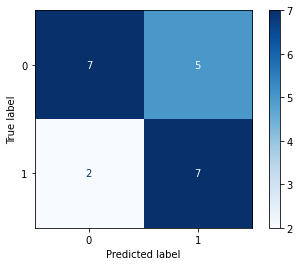

In [194]:

model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train, y_train)
model_DecisionTreeClassifier_prediction = model_DecisionTreeClassifier.predict(X_test)
model_DecisionTreeClassifier_scores = cross_val_score(model_DecisionTreeClassifier, X, y, cv=10)

model_DT_y_score = model_DecisionTreeClassifier.fit(X_train, y_train).predict_proba(X_test)
fpr_DT_model, tpr_DT_model,_ = metrics.roc_curve(np.array(y_test), model_DT_y_score[::,1])

roc_auc.append(metrics.auc(fpr_DT_model,tpr_DT_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_DecisionTreeClassifier_prediction, y_test))
cvs_selection.append(np.mean(model_DecisionTreeClassifier_scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(model_DecisionTreeClassifier_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_DecisionTreeClassifier_scores), np.std(model_DecisionTreeClassifier_scores)*2))

model_DecisionTreeClassifier_pred_test_y = model_DecisionTreeClassifier.predict(X_test)
metrics.plot_confusion_matrix(model_DecisionTreeClassifier, X_test.values, y_test, cmap='Blues')
plt.grid(False)

Logistic Regression Accuracy: 66.67%


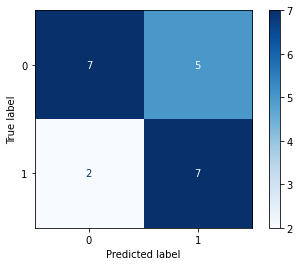

In [199]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
model_LR.fit(X_train, y_train)
model_LR_prediction = model_LR.predict(X_test)
model_LR_scores = cross_val_score(model_LR, X, y, cv=10)

model_LR_y_score = model_LR.fit(X_train, y_train).predict_proba(X_test)
fpr_LR_model, tpr_LR_model,_ = metrics.roc_curve(np.array(y_test), model_LR_y_score[::,1])

roc_auc.append(metrics.auc(fpr_LR_model,tpr_LR_model)) ###計算auc的值
accuracy_selection.append(accuracy_score(model_LR_prediction, y_test))
cvs_selection.append(np.mean(model_LR_scores))

print("Logistic Regression Accuracy: {0:.2%}".format(accuracy_score(model_LR_prediction, y_test)))
# print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(model_DecisionTreeClassifier_scores), np.std(model_DecisionTreeClassifier_scores)*2))

model_LR_pred_test_y = model_LR.predict(X_test)
metrics.plot_confusion_matrix(model_LR, X_test.values, y_test, cmap='Blues')
plt.grid(False)

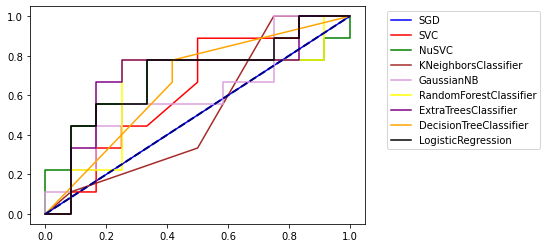

<Figure size 720x1440 with 0 Axes>

In [196]:

lw = 2
# metrics.roc_auc_score(np.array(y_test),y_score[::,1])
plt.plot(fpr_SGD_model,tpr_SGD_model,color='blue',label="SGD")
plt.plot(fpr_SVC_model,tpr_SVC_model,color='red',label="SVC")
plt.plot(fpr_NuSVC_model,tpr_NuSVC_model,color='green',label="NuSVC")
plt.plot(fpr_KN_model,tpr_KN_model,color='brown',label="KNeighborsClassifier")
plt.plot(fpr_GNB_model,tpr_GNB_model,color='plum',label="GaussianNB")
plt.plot(fpr_RF_model,tpr_RF_model,color='yellow',label="RandomForestClassifier")
plt.plot(fpr_EC_model,tpr_EC_model,color='purple',label="ExtraTreesClassifier")
plt.plot(fpr_DT_model,tpr_DT_model,color='orange',label="DecisionTreeClassifier")
plt.plot(fpr_LR_model,tpr_LR_model,color='black',label="LogisticRegression")


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.figure(figsize=(10,20))
plt.show()

In [197]:
d = {'accuracy_selection':accuracy_selection, 
     'cvs_selection':cvs_selection, 'AUC':roc_auc,}
# print(accuracy_selection)
# print(cvs_selection)
# print(roc_auc)

index = ['SGD', 'SVC', 'NuSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree','LogisticRegression']

df = pd.DataFrame(d, index=index)

In [198]:
df

,accuracy_selection,cvs_selection,AUC
SGD,0.428571,0.606364,0.500000
SVC,0.523810,0.617273,0.629630
NuSVC,0.666667,0.665455,0.675926
KNeighbors,0.428571,0.462727,0.513889
GaussianNB,0.523810,0.617273,0.611111
RandomForest,0.714286,0.704545,0.638889
ExtraTrees,0.714286,0.653636,0.703704
DecisionTree,0.714286,0.624545,0.657407
LogisticRegression,0.666667,0.695455,0.694444


best param: 5; best score: 0.7142857142857143


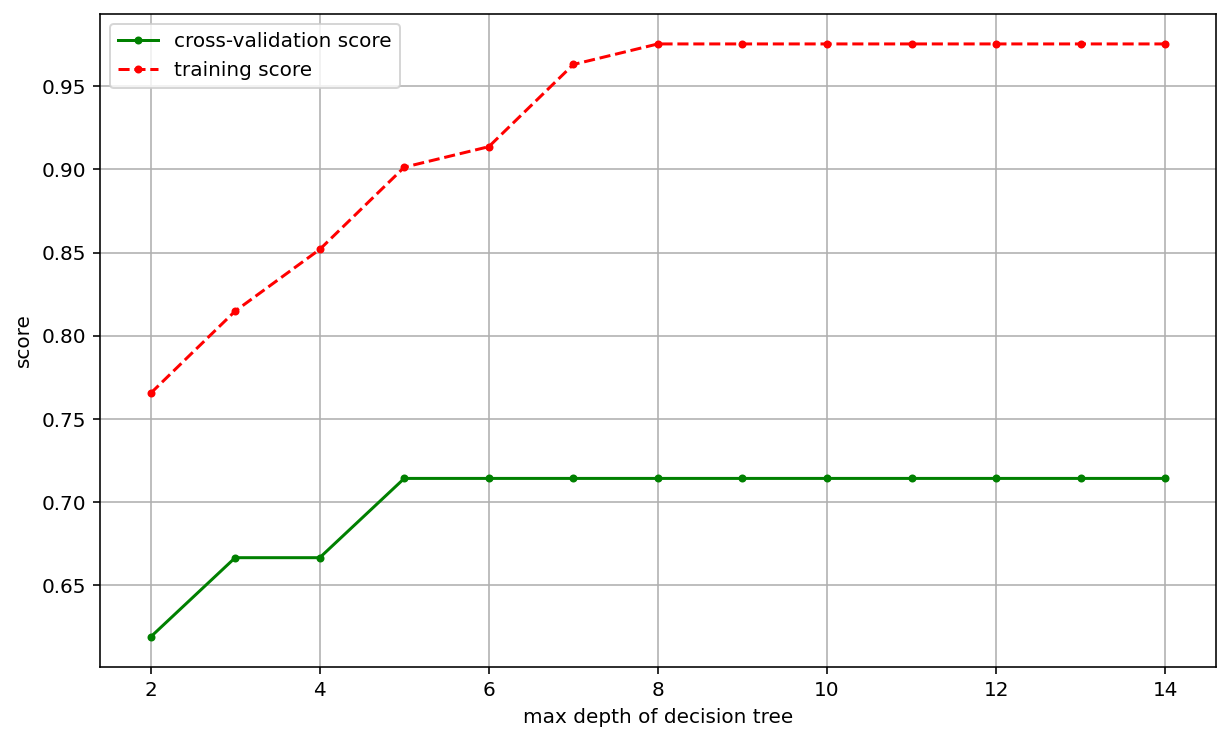

In [76]:

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

In [77]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impu

best param: {'min_impurity_split': 0.37755102040816324}
best score: 0.7433333333333334


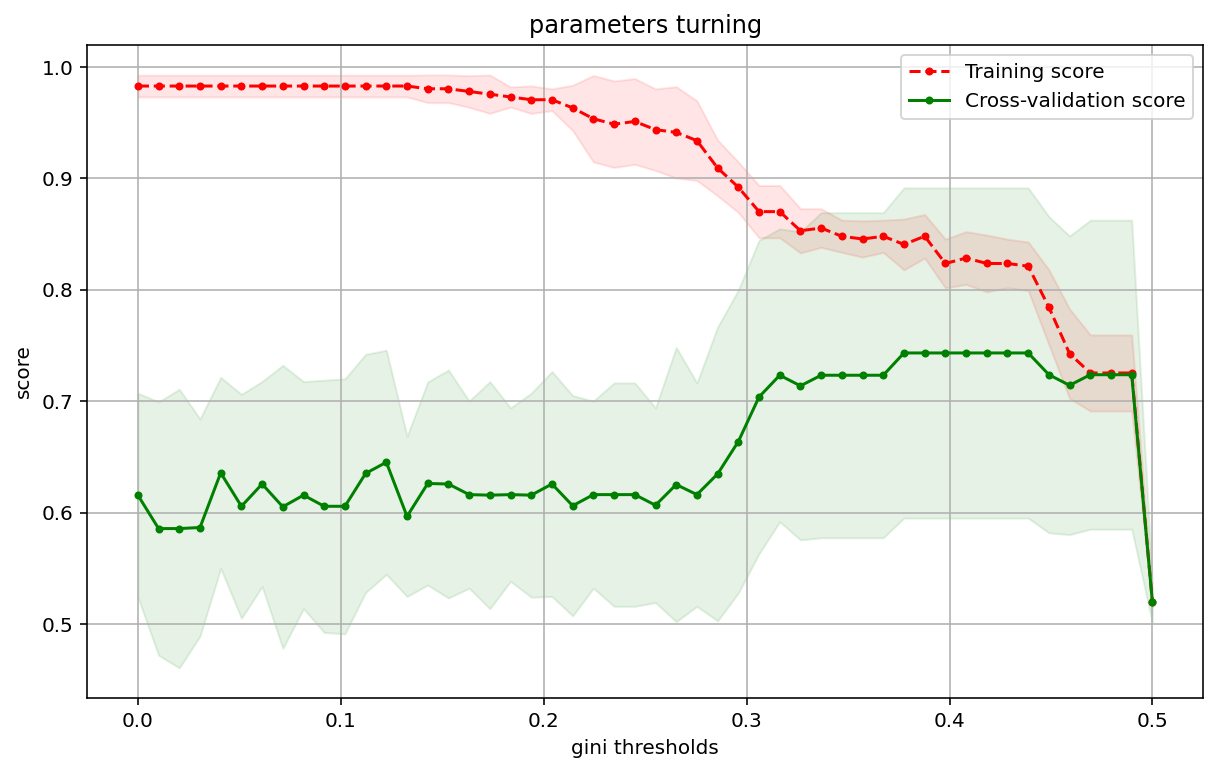

In [78]:
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [79]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.37755102040816324)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("Decision_Tree/Weight_偏好+喜好_混淆矩陣_ROC_rs10.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.9753086419753086; test score: 0.7142857142857143


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
